<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


In [2]:
data = pd.read_csv('/datasets/autos.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
# Проверим наличие дублей
data.duplicated().sum()

4

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365.0,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989,5.714650,0.0,50508.503800
std,4514.176349,90.228466,189.851330,37905.083858,3.726432,0.0,25783.100078
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Данные содержат параметры не нужные для дальнейшей работы - DateCrawled, RegistrationMonth, NumberOfPictures, PostalCode, LastSeen. Удалим эти столбцы.

In [7]:
data = data.drop(['DateCrawled', 'RegistrationMonth', 'NumberOfPictures', 'PostalCode', 'LastSeen' ], axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       316875 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           334532 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             334660 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          321470 non-null  object
 8   Brand             354365 non-null  object
 9   NotRepaired       283211 non-null  object
 10  DateCreated       354365 non-null  object
dtypes: int64(4), object(7)
memory usage: 32.4+ MB


In [9]:
# DateCreated сделаем датой
data['DateCreated'] = pd.to_datetime(data['DateCreated'])

In [10]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,DateCreated
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,2016-03-24
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,2016-03-24
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,2016-03-14
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,2016-03-17
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,2016-03-31


In [11]:
# Посмотрим пропуски
data.isna().mean()

Price               0.000000
VehicleType         0.105795
RegistrationYear    0.000000
Gearbox             0.055968
Power               0.000000
Model               0.055607
Kilometer           0.000000
FuelType            0.092828
Brand               0.000000
NotRepaired         0.200793
DateCreated         0.000000
dtype: float64

In [12]:
# Нет уверенности, что можно корректно заменить пропуски по подгруппам. Добавим новый вариант unknown
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna('unknown', inplace=True)        

In [13]:
# Проверим
data.isna().mean()

Price               0.0
VehicleType         0.0
RegistrationYear    0.0
Gearbox             0.0
Power               0.0
Model               0.0
Kilometer           0.0
FuelType            0.0
Brand               0.0
NotRepaired         0.0
DateCreated         0.0
dtype: float64

**Посмотрим выбросы**

Исходя из таблицы описательных статистик, стоит проверить год регистрации автомобиля.

In [14]:
data['RegistrationYear'].value_counts(sort=True)

2000    24490
1999    22727
2005    22109
2001    20123
2006    19900
        ...  
4100        1
1200        1
5300        1
8888        1
2290        1
Name: RegistrationYear, Length: 151, dtype: int64

In [15]:
print (np.sort(data['RegistrationYear'].unique()))

[1000 1001 1039 1111 1200 1234 1253 1255 1300 1400 1500 1600 1602 1688
 1800 1910 1915 1919 1920 1923 1925 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2066 2200 2222 2290 2500 2800 2900 3000 3200 3500 3700 3800 4000
 4100 4500 4800 5000 5300 5555 5600 5900 5911 6000 6500 7000 7100 7500
 7800 8000 8200 8455 8500 8888 9000 9229 9450 9996 9999]


Наличие и структура слишком высоких и слишком низких значений в показателе говорит о том, что нужно определить границы - год, который мы будем считать минимально возможным для решения нашей задачи, и год, максимально возможный. Скорее всего, регистрация автомобиля не могла произойти после создания анкеты.

In [16]:
# Посмотрим даты создания анкет
data.sort_values(by='DateCreated', ascending=True)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,DateCreated
61207,8999,unknown,2005,unknown,0,147,125000,petrol,alfa_romeo,unknown,2014-03-10
4001,6000,bus,1995,auto,200,other,150000,petrol,chevrolet,no,2015-03-20
342275,10400,bus,1993,unknown,0,ducato,30000,gasoline,fiat,unknown,2015-06-18
86601,14250,convertible,2005,manual,163,slk,150000,petrol,mercedes_benz,no,2015-08-07
175103,5200,convertible,2006,manual,109,2_reihe,80000,petrol,peugeot,no,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...
184411,550,small,1997,manual,60,ka,150000,petrol,ford,no,2016-04-07
262340,2190,wagon,1998,manual,110,a4,150000,gasoline,audi,no,2016-04-07
214462,1890,wagon,2000,manual,150,a4,5000,gasoline,audi,no,2016-04-07
241969,15490,convertible,2010,manual,150,c_reihe,125000,gasoline,volvo,no,2016-04-07


Согласно Википедии: "В Европе предпочитают использовать термин олдтаймер (англ. Oldtimer) — «старинный, раритетный автомобиль». Как правило, под этим словом имеют в виду машину, выпущенную более 30 лет назад." URL: https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8C

Таким образом, из общей базы необходимо удалить все автомобили, зарегестрированные позже 2016 года и все автомобили, зарегестрированные ранее 1986 года, как раритеные.

In [17]:
data.drop(data[data['RegistrationYear'] > 2016].index, inplace=True)
data.drop(data[data['RegistrationYear'] < 1986].index, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333631 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Price             333631 non-null  int64         
 1   VehicleType       333631 non-null  object        
 2   RegistrationYear  333631 non-null  int64         
 3   Gearbox           333631 non-null  object        
 4   Power             333631 non-null  int64         
 5   Model             333631 non-null  object        
 6   Kilometer         333631 non-null  int64         
 7   FuelType          333631 non-null  object        
 8   Brand             333631 non-null  object        
 9   NotRepaired       333631 non-null  object        
 10  DateCreated       333631 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 30.5+ MB


Посмотрим распределение цены

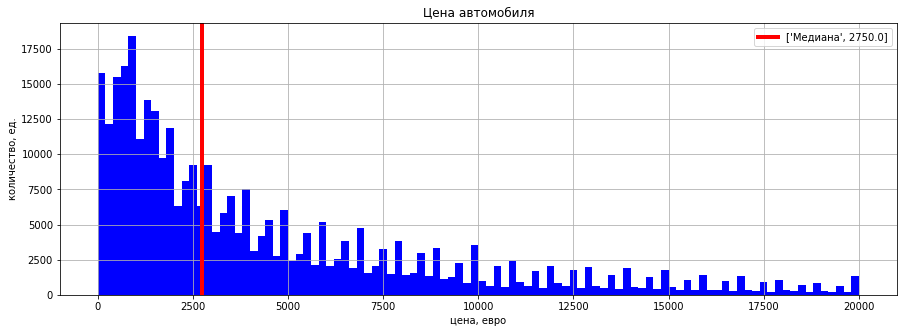

In [19]:
data.hist('Price', bins=100, color='blue', figsize = (15, 5))
plt.title('Цена автомобиля')
plt.xlabel('цена, евро')
plt.ylabel('количество, ед.')
plt.axvline(x=data['Price'].median(), 
            color='red', lw=4, label=['Медиана',round(data['Price'].median(),2)])
plt.legend() 
plt.show()

In [20]:
data['Price'].describe()

count    333631.000000
mean       4448.099841
std        4528.658346
min           0.000000
25%        1099.000000
50%        2750.000000
75%        6499.000000
max       20000.000000
Name: Price, dtype: float64

Нужно убрать значения 0

In [21]:
data.drop(data[data['Price'] == 0].index, inplace=True)

In [22]:
data1 = data[data['Price']<1099]

In [23]:
data1['Price'].describe()

count    73830.000000
mean       607.771556
std        281.730514
min          1.000000
25%        400.000000
50%        600.000000
75%        850.000000
max       1098.000000
Name: Price, dtype: float64

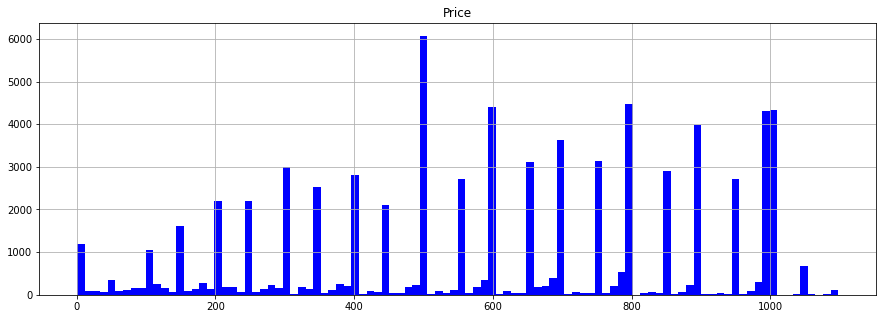

In [24]:
data1.hist('Price', bins=100, color='blue', figsize = (15, 5))
plt.show()

Удалим данные, где стоимость менее 200 евро. Восстановить данные, достоверно, крайне затруднительно.

In [25]:
data.drop(data[data['Price'] < 200].index, inplace=True)

<AxesSubplot:ylabel='Price'>

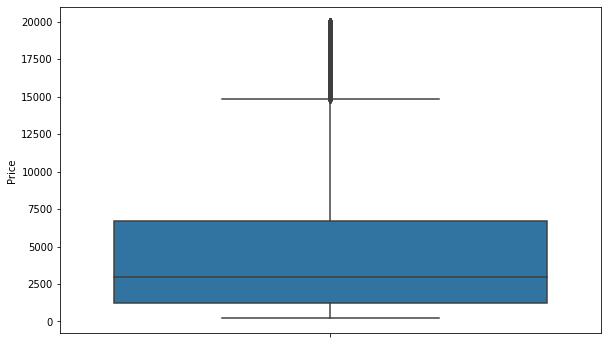

In [26]:
plt.figure(figsize=(9.7, 6))
sns.boxplot(y=data['Price'])

В стоимости автомобилей  нет значений, которые можно было бы назвать аномально высокими. Оставим.

In [27]:
data.describe()

,Price,RegistrationYear,Power,Kilometer
count,317845.000000,317845.000000,317845.000000,317845.000000
mean,4667.014073,2003.138703,113.630279,128853.906778
std,4529.269884,5.745849,183.907250,36670.529900
min,200.000000,1986.000000,0.000000,5000.000000
25%,1250.000000,1999.000000,75.000000,125000.000000
50%,2990.000000,2003.000000,105.000000,150000.000000
75%,6700.000000,2007.000000,143.000000,150000.000000
max,20000.000000,2016.000000,20000.000000,150000.000000


У 75% авто мощность не превышает 143 л.с. Существует ряд автомобилей, с очень высокой мощностью, но 1500 л.с. есть только в обсуждениях (15 лучших автомобилей мощностью 1000 л.с. и более, https://1gai.ru/publ/515244-15-luchshih-avtomobiley-moschnostyu-1000-ls-i-bolee.html).  

(-10.0, 1000.0)

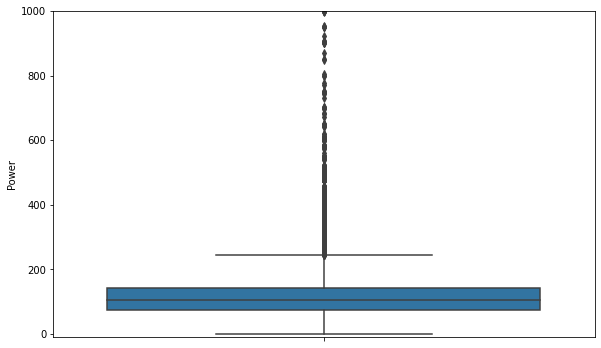

In [28]:
plt.figure(figsize=(9.7, 6))
sns.boxplot(y=data['Power'])
plt.ylim(-10, 1000)
 

In [29]:
data[data['Power'] > 300]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,DateCreated
41,7500,sedan,2002,auto,306,e_klasse,150000,unknown,mercedes_benz,unknown,2016-03-30
172,19750,convertible,2006,manual,305,mustang,50000,petrol,ford,no,2016-03-07
204,18400,wagon,2011,auto,313,5er,150000,gasoline,bmw,no,2016-03-31
393,6250,unknown,2016,manual,310,astra,150000,unknown,opel,unknown,2016-04-01
485,15200,sedan,2007,auto,320,s_klasse,150000,gasoline,mercedes_benz,no,2016-03-07
...,...,...,...,...,...,...,...,...,...,...,...
354045,20000,coupe,2006,auto,476,other,125000,petrol,mercedes_benz,no,2016-03-22
354067,11500,wagon,2005,auto,340,300c,150000,petrol,chrysler,no,2016-03-20
354096,15550,sedan,2006,auto,334,a6,90000,petrol,audi,unknown,2016-03-16
354260,399,other,1994,unknown,1103,3er,150000,unknown,bmw,unknown,2016-03-09


В нашем случае, значения выше 300 л.с. являются выбросами. Всего таких записей 3203, что чуть больше 1%. Удалим.

In [30]:
data.drop(data[data['Power'] > 300].index, inplace=True)

In [31]:
data['Power'].describe()

count    314642.000000
mean        108.146443
std          57.689423
min           0.000000
25%          75.000000
50%         105.000000
75%         143.000000
max         300.000000
Name: Power, dtype: float64

Заменим 0 на медиану по подгруппам

In [32]:
data[data['Power'] == 0]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,DateCreated
0,480,unknown,1993,manual,0,golf,150000,petrol,volkswagen,unknown,2016-03-24
32,245,sedan,1994,unknown,0,golf,150000,petrol,volkswagen,no,2016-03-15
37,1500,unknown,2016,unknown,0,kangoo,150000,gasoline,renault,no,2016-03-28
54,4700,wagon,2005,manual,0,signum,150000,unknown,opel,no,2016-03-17
55,550,wagon,1999,manual,0,astra,150000,gasoline,opel,yes,2016-03-26
...,...,...,...,...,...,...,...,...,...,...,...
354335,390,small,1997,auto,0,corsa,100000,petrol,opel,yes,2016-04-04
354336,3299,unknown,2005,auto,0,outlander,150000,petrol,mitsubishi,unknown,2016-03-05
354346,2600,unknown,2005,auto,0,c_klasse,150000,unknown,mercedes_benz,unknown,2016-03-07
354363,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no,2016-03-27


In [33]:
data['Power'] = data['Power'].replace(0, np.nan)
median = data.groupby(['Brand', 'Model', 'FuelType'])['Power'].transform('median')
data['Power'] = data['Power'].fillna(median)

In [34]:
# Проверим 
data['Power'].isnull().sum()

56

In [35]:
data.dropna(inplace=True)

In [36]:
data.isnull().sum().sum()

0

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314586 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Price             314586 non-null  int64         
 1   VehicleType       314586 non-null  object        
 2   RegistrationYear  314586 non-null  int64         
 3   Gearbox           314586 non-null  object        
 4   Power             314586 non-null  float64       
 5   Model             314586 non-null  object        
 6   Kilometer         314586 non-null  int64         
 7   FuelType          314586 non-null  object        
 8   Brand             314586 non-null  object        
 9   NotRepaired       314586 non-null  object        
 10  DateCreated       314586 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 28.8+ MB


In [38]:
data['Kilometer'].describe()

count    314586.000000
mean     128792.460567
std       36705.626129
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: Kilometer, dtype: float64

В данных о пробеге, выбросов нет.

Посмотрим, нет ли еще каких-то неточностей.

In [39]:
data['VehicleType'].value_counts()

sedan          85524
small          75036
wagon          62478
bus            27943
convertible    18856
unknown        17038
coupe          13947
suv            11004
other           2760
Name: VehicleType, dtype: int64

In [40]:
data['Gearbox'].value_counts()

manual     242551
auto        59047
unknown     12988
Name: Gearbox, dtype: int64

In [41]:
data['Model'].unique()

array(['golf', 'unknown', 'grand', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'other', 'civic', 'punto', 'e_klasse',
       'clio', 'kadett', 'kangoo', 'one', 'fortwo', '1er', 'b_klasse',
       'signum', 'astra', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra',
       'vito', 'sprinter', '156', 'escort', 'forester', 'xc_reihe',
       'scenic', 'a4', 'ka', 'a1', 'insignia', 'transporter', 'combo',
       'focus', 'tt', 'corsa', 'a6', 'jazz', 'omega', 'slk', '7er', '80',
       '147', 'z_reihe', 'sorento', 'v40', 'ibiza', 'eos', 'touran',
       'getz', 'a3', 'almera', 'megane', 'lupo', 'r19', 'mondeo',
       'cordoba', 'colt', 'impreza', 'vectra', 'berlingo', 'tiguan',
       'mustang', 'sharan', '6_reihe', 'c4', 'panda', 'up', 'i_reihe',
       'ceed', '5_reihe', 'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe',
       'modus', 'fox', 'matiz', 'beetle', 'rio', 'touareg', 'logan',
       'caddy

In [42]:
data['FuelType'].value_counts()

petrol      194276
gasoline     93783
unknown      20949
lpg           4675
cng            516
hybrid         215
other           91
electric        81
Name: FuelType, dtype: int64

In [43]:
data['Brand'].value_counts()

volkswagen        68067
opel              34934
bmw               33472
mercedes_benz     28319
audi              26715
ford              22135
renault           15775
peugeot           10201
fiat               8328
seat               6205
skoda              5239
mazda              5139
smart              4935
citroen            4579
nissan             4449
toyota             4339
hyundai            3355
mini               3031
volvo              2943
mitsubishi         2719
honda              2550
kia                2282
suzuki             2104
alfa_romeo         2031
sonstige_autos     1677
chevrolet          1479
chrysler           1252
dacia               862
daihatsu            700
subaru              679
jeep                579
land_rover          491
saab                483
daewoo              481
jaguar              419
rover               408
porsche             400
lancia              390
trabant             263
lada                177
Name: Brand, dtype: int64

In [44]:
data['NotRepaired'].value_counts()

no         229903
unknown     54475
yes         30208
Name: NotRepaired, dtype: int64

Ничего сомнительного нет. 

In [45]:
# Дата создания анкеты больше не нужна
data = data.drop(['DateCreated'], axis = 1)

In [46]:
# Проверим тип данных
data.dtypes

Price                 int64
VehicleType          object
RegistrationYear      int64
Gearbox              object
Power               float64
Model                object
Kilometer             int64
FuelType             object
Brand                object
NotRepaired          object
dtype: object

In [47]:
# Преобразуем категориальные переменные
cols_cat = data.select_dtypes(include='object').columns
for col in cols_cat:
    data[col] = data[col].astype('category')

In [48]:
# Преобразуем категориальные признаки
data = pd.get_dummies((data), drop_first = True)

### Вывод

Был обработан массив данных, содержащий технические характеристики, комплектации и цены автомобилей:
- Удалены дубликаты.
- Неответы категореальных признаков замененв на unknown.
- Удалены выбросы.
- Неответы в признаке Power скорректированы в соответствии со значениями признаков Model, Brand, FuelType.
- Категориальные признаки преобразованы техникой OHE.

## Обучение моделей

In [49]:
# Создадим объект RandomState() из модуля numpy.random
state = np.random.RandomState(12345)

In [50]:
# Создадим переменные features и target
features = data.drop(['Price'], axis=1)
target = data['Price']

In [51]:
# Создадим тестовые выборки
features, features_test, target, target_test = train_test_split(features, target, test_size= 0.2, random_state=state)

In [52]:
# Создадим обучающую и валидационную выборки
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=state)

In [53]:
# Проверим
print('features_test', features_test.shape)
print('target_test', target_test.shape)
print('features_train', features_train.shape)
print('target_train', target_train.shape)
print('features_valid', features_valid.shape)
print('target_valid', target_valid.shape)

features_test (62918, 308)
target_test (62918,)
features_train (188751, 308)
target_train (188751,)
features_valid (62917, 308)
target_valid (62917,)


In [54]:
# проведем масштабирование численных признаков
numeric = ['RegistrationYear', 'Power', 'Kilometer']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [55]:
features_train.sample()

,RegistrationYear,Power,Kilometer,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_unknown,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_unknown,NotRepaired_yes
228060,0.495036,-0.897136,-2.966584,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Добавим функцию времени, позволяющую ответить на вопрос Заказчика о скорости предсказания и времени обучения.

In [56]:
import time
def exec_time(start, end):
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
    print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

Добавим функцию rmse

In [57]:
def rmse(target, predictions):
    mse = mean_squared_error(target, predictions)
    rmse = mse**0.5
    return rmse

Рассмотрим 4 модели: линейную регрессию, дерево решений, LightGBM и CatBoost.

Линейная регрессия

In [58]:
%%time
start = time.time()
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
end = time.time()
exec_time(start,end)
start = time.time()
predicted_lr = model_lr.predict(features_valid)
end = time.time()
exec_time(start,end)
rmse_lr = rmse(target_valid, predicted_lr)
print('RMSE:', rmse_lr.round(2))

Execution Time: 00:00:23
Execution Time: 00:00:00
RMSE: 2333.4
CPU times: user 11.7 s, sys: 11.6 s, total: 23.2 s
Wall time: 23.2 s


Дерево решений

In [59]:
%%time
model_dtc = DecisionTreeRegressor(random_state=state, max_depth=1) 
start = time.time()
model_dtc.fit(features_train, target_train)
end = time.time()
exec_time(start,end)
start = time.time()
predicted_dtc = model_dtc.predict(features_valid)
end = time.time()
exec_time(start,end)
rmse_dtc = rmse(target_valid, predicted_dtc)           

print('RMSE:', rmse_dtc.round(2))

Execution Time: 00:00:01
Execution Time: 00:00:00
RMSE: 3489.26
CPU times: user 423 ms, sys: 267 ms, total: 690 ms
Wall time: 726 ms


LGBMRegressor

In [60]:
%%time
model_lgbm = LGBMRegressor(n_estimators=120, max_depth=16, random_state = state)
start = time.time()
model_lgbm.fit(features_train, target_train)
end = time.time()
exec_time(start,end)
start = time.time()
predicted_lgbm = model_lgbm.predict(features_valid, verbose=2)
end = time.time()
exec_time(start,end)
rmse_lgbm = rmse(target_valid, predicted_lgbm)
print('RMSE:', rmse_lgbm.round(2))

Execution Time: 00:06:45
Execution Time: 00:00:01
RMSE: 1572.23
CPU times: user 6min 38s, sys: 4.31 s, total: 6min 42s
Wall time: 6min 46s


CatBoostRegressor

Вариант 1. Гиперпараметры: iterations=10, loss_function='RMSE', depth=16

In [61]:
%%time

model_cat = CatBoostRegressor(random_state=12345, iterations=120, loss_function='RMSE', depth=16)
start = time.time()
model_cat.fit(features_train, target_train)
end = time.time()
exec_time(start,end)
start = time.time()
predicted_cat = model_cat.predict(features_valid, verbose=1)
end = time.time()
exec_time(start,end)
rmse_cat = rmse(target_valid, predicted_cat)
               
print('RMSE:', rmse_cat.round(2))

Learning rate set to 0.5
0:	learn: 2894.9384402	total: 1.26s	remaining: 2m 29s
1:	learn: 2163.0227489	total: 2.43s	remaining: 2m 23s
2:	learn: 1877.8747128	total: 3.58s	remaining: 2m 19s
3:	learn: 1741.3271544	total: 4.74s	remaining: 2m 17s
4:	learn: 1673.6996845	total: 5.84s	remaining: 2m 14s
5:	learn: 1638.1817367	total: 6.93s	remaining: 2m 11s
6:	learn: 1602.2701138	total: 8s	remaining: 2m 9s
7:	learn: 1586.3770171	total: 9.07s	remaining: 2m 7s
8:	learn: 1571.9266587	total: 10.2s	remaining: 2m 5s
9:	learn: 1557.1131401	total: 11.3s	remaining: 2m 4s
10:	learn: 1547.9889723	total: 12.5s	remaining: 2m 4s
11:	learn: 1538.7143134	total: 13.6s	remaining: 2m 2s
12:	learn: 1529.1748087	total: 14.8s	remaining: 2m 1s
13:	learn: 1519.3252103	total: 15.9s	remaining: 2m
14:	learn: 1510.0674107	total: 17s	remaining: 1m 59s
15:	learn: 1502.0414182	total: 18.1s	remaining: 1m 57s
16:	learn: 1494.2989555	total: 19.4s	remaining: 1m 57s
17:	learn: 1487.0723542	total: 20.6s	remaining: 1m 56s
18:	learn: 

Вариант 2. Гиперпараметры: iterations=5, loss_function='RMSE', depth=10

In [62]:
%%time

model_cat = CatBoostRegressor(random_state=12345, iterations=5, loss_function='RMSE', depth=10)
start = time.time()
model_cat.fit(features_train, target_train)
end = time.time()
exec_time(start,end)
start = time.time()
predicted_cat = model_cat.predict(features_valid, verbose=1)
end = time.time()
exec_time(start,end)
rmse_cat = rmse(target_valid, predicted_cat)
               
print('RMSE:', rmse_cat.round(2))

Learning rate set to 0.5
0:	learn: 3000.2887504	total: 44.1ms	remaining: 176ms
1:	learn: 2331.7824199	total: 88.5ms	remaining: 133ms
2:	learn: 2047.2047265	total: 134ms	remaining: 89.6ms
3:	learn: 1901.9725512	total: 180ms	remaining: 45ms
4:	learn: 1832.7197926	total: 226ms	remaining: 0us
Execution Time: 00:00:02
Execution Time: 00:00:00
RMSE: 1812.05
CPU times: user 1.21 s, sys: 21.7 ms, total: 1.23 s
Wall time: 1.95 s


Вариант 3. Гиперпараметры: iterations=1, loss_function='RMSE', depth=3

In [63]:
%%time

model_cat = CatBoostRegressor(random_state=12345, iterations=1, loss_function='RMSE', depth=3)
start = time.time()
model_cat.fit(features_train, target_train)
end = time.time()
exec_time(start,end)
start = time.time()
predicted_cat = model_cat.predict(features_valid, verbose=1)
end = time.time()
exec_time(start,end)
rmse_cat = rmse(target_valid, predicted_cat)
               
print('RMSE:', rmse_cat.round(2))

Learning rate set to 0.5
0:	learn: 3391.9267342	total: 17ms	remaining: 0us
Execution Time: 00:00:01
Execution Time: 00:00:00
RMSE: 3362.72
CPU times: user 1.14 s, sys: 10.9 ms, total: 1.15 s
Wall time: 1.5 s


Самые хорошие результаты, среди трех вариантов моделиCatBoostRegressor, у модели с гиперпараметрами iterations=10, loss_function='RMSE', depth=16. Ее RMSE = 1478.38.У двух других вариантов -  1812.05 и 3362.72.

### Вывод
Обучены 4 модели: линейная регрессия, дерево решений, LightGBM и CatBoost.

## Анализ моделей

**Модель линейной регрессии:**
 - Длительность обучения:  23 секунды
 - Длительность предсказания: менее 0 секунд
 - RMSE: 2333.4
 - Общее время: 23.2 секунды

**Дерево решений**
 - Длительность обучения: менее 1 секунды
 - Длительность предсказания: менее 0 секунд
 - RMSE: 3489.26
 - Общее время: 726 милисекунд
 
   
**LGBMRegressor**
 - Длительность обучения: 6 минут 45 секунд
 - Длительность предсказания: 1 секунда
 - RMSE: 1572.23
 - Общее время:  6 минут 46 секунд

 
**CatBoostRegressor**
 - Длительность обучения: 2 минуты 17 секунд
 - Длительность предсказания: менее 0 секунд
 - RMSE: 1478.38
 - Общее время: 2 минуты 17 секунд


### Вывод
Наиболее эффективно показала себя модель CatBoostRegressor. Гиперпараметры: iterations=10, loss_function='RMSE', depth=16.

Проверим ее на тестовой выборке

In [65]:
%%time
model_best = CatBoostRegressor(random_state=12345, iterations=120, loss_function='RMSE', depth=16)
model_best.fit(features_train, target_train)
predicted = model_best.predict(features_test, verbose=1)
rmse_best = rmse(target_test, predicted)
print('RMSE:', rmse_best.round(2))

Learning rate set to 0.5
0:	learn: 2894.9384402	total: 1.1s	remaining: 2m 10s
1:	learn: 2163.0227489	total: 2.21s	remaining: 2m 10s
2:	learn: 1877.8747128	total: 3.31s	remaining: 2m 8s
3:	learn: 1741.3271544	total: 4.45s	remaining: 2m 9s
4:	learn: 1673.6996845	total: 5.67s	remaining: 2m 10s
5:	learn: 1638.1817367	total: 6.76s	remaining: 2m 8s
6:	learn: 1602.2701138	total: 7.86s	remaining: 2m 6s
7:	learn: 1586.3770171	total: 9.02s	remaining: 2m 6s
8:	learn: 1571.9266587	total: 10.1s	remaining: 2m 4s
9:	learn: 1557.1131401	total: 11.2s	remaining: 2m 3s
10:	learn: 1547.9889723	total: 12.3s	remaining: 2m 2s
11:	learn: 1538.7143134	total: 13.5s	remaining: 2m 1s
12:	learn: 1529.1748087	total: 14.6s	remaining: 2m
13:	learn: 1519.3252103	total: 15.7s	remaining: 1m 58s
14:	learn: 1510.0674107	total: 16.8s	remaining: 1m 57s
15:	learn: 1502.0414182	total: 17.8s	remaining: 1m 56s
16:	learn: 1494.2989555	total: 19s	remaining: 1m 55s
17:	learn: 1487.0723542	total: 20.1s	remaining: 1m 53s
18:	learn: 

Хороший результат. RMSE на тестовой выборке 1467.69

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей